In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

#### Load The data files
###### Display data frame head

In [2]:
data_frame = pd.read_excel('C:/Users/amran/Downloads/oasis_longitudinal_demographics.xlsx')

data_frame.head() 

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


#### Data pre-processing and selection

Lets first look at columns data types

In [3]:
data_frame.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV          float64
nWBV          float64
ASF           float64
dtype: object

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 43.8+ KB


#### Histogram

array([[<AxesSubplot:title={'center':'Visit'}>,
        <AxesSubplot:title={'center':'MR Delay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'EDUC'}>,
        <AxesSubplot:title={'center':'SES'}>,
        <AxesSubplot:title={'center':'MMSE'}>],
       [<AxesSubplot:title={'center':'CDR'}>,
        <AxesSubplot:title={'center':'eTIV'}>,
        <AxesSubplot:title={'center':'nWBV'}>],
       [<AxesSubplot:title={'center':'ASF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

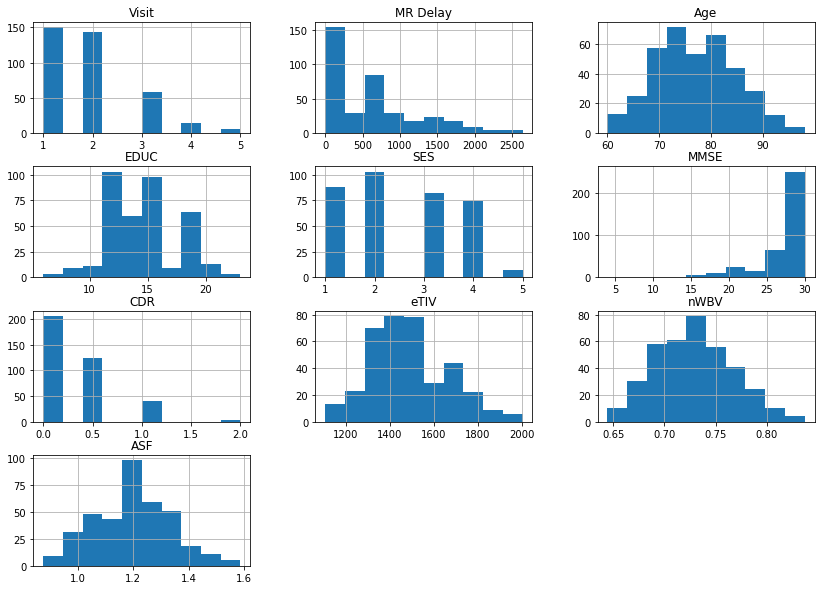

In [5]:
data_frame.hist(figsize =(14,10))

#### Correlation Heatmap

<AxesSubplot:>

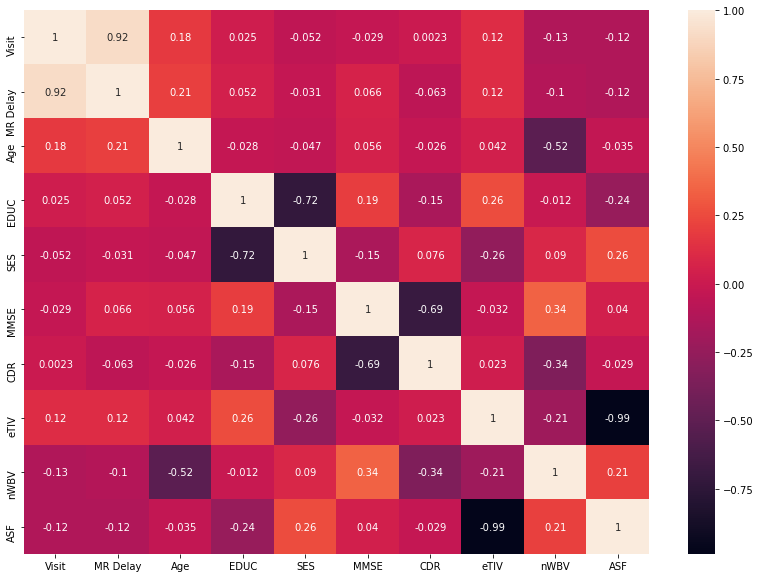

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14,10))

sns.heatmap(data_frame[data_frame.columns].corr(), annot=True)

#### Dealing the missing values

In [7]:
missing_data = data_frame.isnull()
missing_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Count missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Subject ID
False    373
Name: Subject ID, dtype: int64
 
MRI ID
False    373
Name: MRI ID, dtype: int64
 
Group
False    373
Name: Group, dtype: int64
 
Visit
False    373
Name: Visit, dtype: int64
 
MR Delay
False    373
Name: MR Delay, dtype: int64
 
M/F
False    373
Name: M/F, dtype: int64
 
Hand
False    373
Name: Hand, dtype: int64
 
Age
False    373
Name: Age, dtype: int64
 
EDUC
False    373
Name: EDUC, dtype: int64
 
SES
False    354
True      19
Name: SES, dtype: int64
 
MMSE
False    371
True       2
Name: MMSE, dtype: int64
 
CDR
False    373
Name: CDR, dtype: int64
 
eTIV
False    373
Name: eTIV, dtype: int64
 
nWBV
False    373
Name: nWBV, dtype: int64
 
ASF
False    373
Name: ASF, dtype: int64
 


In [9]:
# check the details value of SES
data_frame['SES'].value_counts()

2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [10]:
#Here 2 is most common values. use the ".idxmax()" method to calculate for us the most common type automatically:

data_frame['SES'].value_counts().idxmax() 

2.0

In [11]:
#replace null with most common values
data_frame['SES'].fillna(2.0, inplace=True)

In [12]:
#check the details value of MMSE
data_frame['MMSE'].value_counts()

30.0    114
29.0     91
28.0     45
27.0     32
26.0     20
25.0     12
23.0     11
21.0     11
20.0      7
22.0      7
17.0      5
24.0      4
16.0      3
19.0      3
18.0      2
15.0      2
7.0       1
4.0       1
Name: MMSE, dtype: int64

In [13]:
#30 is the most common value. We can also use the ".idxmax()" method to calculate for us the most common type automatically:
data_frame['MMSE'].value_counts().idxmax()

30.0

In [14]:
#replace null with most common values
data_frame['MMSE'].fillna(30,inplace=True)

In [15]:
missing_data = data_frame.isnull()
missing_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Subject ID  373 non-null    bool 
 1   MRI ID      373 non-null    bool 
 2   Group       373 non-null    bool 
 3   Visit       373 non-null    bool 
 4   MR Delay    373 non-null    bool 
 5   M/F         373 non-null    bool 
 6   Hand        373 non-null    bool 
 7   Age         373 non-null    bool 
 8   EDUC        373 non-null    bool 
 9   SES         373 non-null    bool 
 10  MMSE        373 non-null    bool 
 11  CDR         373 non-null    bool 
 12  eTIV        373 non-null    bool 
 13  nWBV        373 non-null    bool 
 14  ASF         373 non-null    bool 
dtypes: bool(15)
memory usage: 5.6 KB


In [17]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Subject ID
False    373
Name: Subject ID, dtype: int64
 
MRI ID
False    373
Name: MRI ID, dtype: int64
 
Group
False    373
Name: Group, dtype: int64
 
Visit
False    373
Name: Visit, dtype: int64
 
MR Delay
False    373
Name: MR Delay, dtype: int64
 
M/F
False    373
Name: M/F, dtype: int64
 
Hand
False    373
Name: Hand, dtype: int64
 
Age
False    373
Name: Age, dtype: int64
 
EDUC
False    373
Name: EDUC, dtype: int64
 
SES
False    373
Name: SES, dtype: int64
 
MMSE
False    373
Name: MMSE, dtype: int64
 
CDR
False    373
Name: CDR, dtype: int64
 
eTIV
False    373
Name: eTIV, dtype: int64
 
nWBV
False    373
Name: nWBV, dtype: int64
 
ASF
False    373
Name: ASF, dtype: int64
 


Let’s see how many of each class is in our data set

In [18]:
data_frame['Subject ID'].value_counts()

OAS2_0073    5
OAS2_0048    5
OAS2_0127    5
OAS2_0070    5
OAS2_0037    4
            ..
OAS2_0128    2
OAS2_0120    2
OAS2_0112    2
OAS2_0086    2
OAS2_0063    2
Name: Subject ID, Length: 150, dtype: int64

In [19]:
# check the total number of subject
data_frame['Subject ID'].nunique()

150

In [20]:
data_frame['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

#### Check for male and female

In [21]:
data_frame.groupby(['M/F','Group'])['Subject ID'].nunique()

M/F  Group      
F    Converted      10
     Demented       28
     Nondemented    50
M    Converted       4
     Demented       36
     Nondemented    22
Name: Subject ID, dtype: int64

#### Group by Male female and Subject ID

In [22]:
data_frame_sub =data_frame.groupby(['M/F','Group'])

In [23]:
data_frame_sub= data_frame_sub.agg({'Subject ID':'nunique'})

In [24]:
data_frame_sub.head()

Subject ID
M/F Group                  
F   Converted            10
    Demented             28
    Nondemented          50
M   Converted             4
    Demented             36

In [25]:
# Change M to 1 and F to 0
data_frame['M/F'] = data_frame['M/F'].replace(['F','M'], [0,1]) 

In [26]:
# Hand cloumn value to numaric data R to 1 and L to 0
data_frame['Hand'] = data_frame['Hand'].replace(['L','R'], [0,1]) # Hand column

In [27]:
# Group :Replace Converted to Demented
data_frame['Group'] = data_frame['Group'].replace(['Converted'], ['Demented'])

In [28]:
data_frame.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,1,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,1,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,1,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [29]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    int64  
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    float64
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(6), int64(6), object(3)
memory usage: 43.8+ KB


#### New dataframe for male female group with Unique Subject ID 

In [30]:
data_frame_new = data_frame.groupby(['M/F','Group'])


In [31]:
data_frame_new = data_frame_new.agg({'Subject ID':'nunique'})

In [32]:
data_frame_new.head()

Subject ID
M/F Group                  
0   Demented             38
    Nondemented          50
1   Demented             40
    Nondemented          22

<AxesSubplot:>

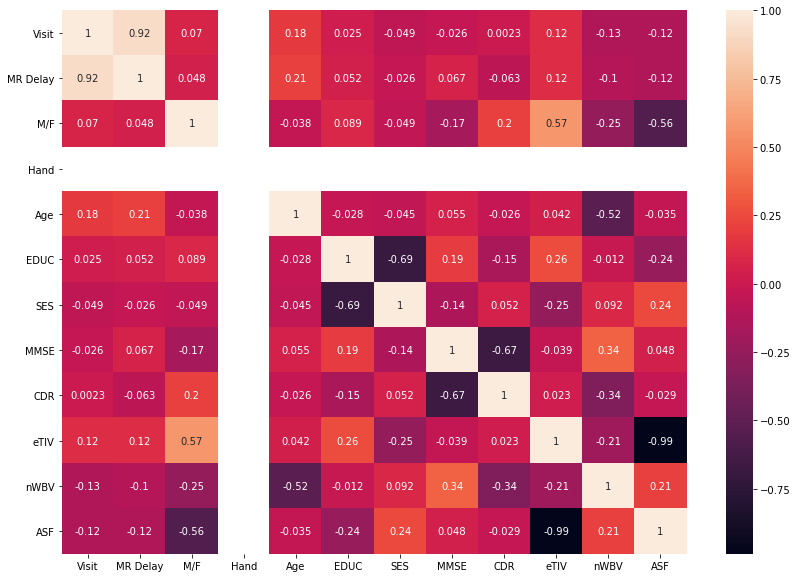

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14,10))

sns.heatmap(data_frame[data_frame.columns].corr(), annot=True)

#### Target value, response variable or dependent variable

In [34]:
y_data = data_frame['Group']

In [35]:
y_data[0:5]

0    Nondemented
1    Nondemented
2       Demented
3       Demented
4       Demented
Name: Group, dtype: object

In [36]:
# Independent variable or regressor as X
# drop unrelated values
X_data = data_frame.drop(['Subject ID','MRI ID','Group'], axis=1)
X_data.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,1,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,2,457,1,1,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,1,0,1,1,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,2,560,1,1,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,3,1895,1,1,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


### Train and Test Split

In [37]:
# import train_test_split library
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

X_train,X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (249, 12) (249,)
Test set: (124, 12) (124,)


#### Normalize Data

Data Standardization give data zero mean and unit variance

In [38]:
X_data= preprocessing.StandardScaler().fit(X_data).transform(X_data)
X_data[0:5]


array([[-0.95706686, -0.93771494,  1.15379808,  0.        ,  1.30873772,
        -0.20813199, -0.3944662 , -0.09706416, -0.77765291,  2.83359462,
        -0.90181966, -2.26232493],
       [ 0.12799678, -0.21761337,  1.15379808,  0.        ,  1.43978716,
        -0.20813199, -0.3944662 ,  0.71958842, -0.77765291,  2.93552502,
        -1.30741435, -2.31961167],
       [-0.95706686, -0.93771494,  1.15379808,  0.        , -0.26385558,
        -0.90439416, -0.3944662 , -1.18593426,  0.55905002,  1.08111854,
         0.18280374, -1.08577527],
       [ 0.12799678, -0.05531476,  1.15379808,  0.        , -0.13280614,
        -0.90439416, -0.3944662 ,  0.17515337,  0.55905002,  1.41841305,
        -0.43550978, -1.34469305],
       [ 1.21306043,  2.04826424,  1.15379808,  0.        ,  0.39139163,
        -0.90439416, -0.3944662 , -1.45815179,  0.55905002,  1.19266583,
        -0.76351198, -1.17341289]])

### Support Vector Machine (SVM)

In [39]:
# import SVM library

from sklearn import svm

In [40]:
svm_clf = svm.SVC(C=1, kernel='linear').fit(X_train, y_train)

In [41]:
yhat_svm = svm_clf.predict(X_test)


In [42]:
SVM_accuracy_score = accuracy_score(y_test,yhat_svm)*100
print("SVM_accuracy_score:", SVM_accuracy_score)

SVM_accuracy_score: 96.7741935483871


##### SVM Confusion matrix

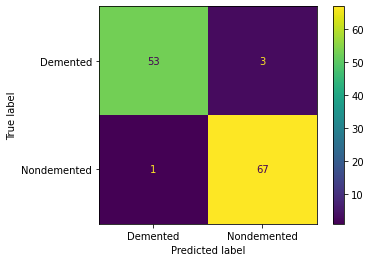

In [43]:
#confusion_matrix(y_test,yhat_svm)
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show() 

In [44]:
# Confusion matrix using crosstab method of pandas.
svm_pd = pd.crosstab(y_test, yhat_svm, rownames=['True'], colnames=['Predicted'], margins=True)
svm_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,53,3,56
Nondemented,1,67,68
All,54,70,124


##### SVM Classification Report

In [45]:
#print(classification_report(y_test,yhat_svm))

print("confusion matrix\n",confusion_matrix(y_test,yhat_svm))
print("\nclassification report\n",classification_report(y_test,yhat_svm))
print("Accuracy: ",accuracy_score(y_test, yhat_svm)*100)

confusion matrix
 [[53  3]
 [ 1 67]]

classification report
               precision    recall  f1-score   support

    Demented       0.98      0.95      0.96        56
 Nondemented       0.96      0.99      0.97        68

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124

Accuracy:  96.7741935483871


In [46]:
SVM_roc_auc_score = roc_auc_score(y_test, svm_clf.decision_function(X_test), average=None)
print("SVM_roc_auc_score:", SVM_roc_auc_score)

SVM_roc_auc_score: 0.9684873949579832


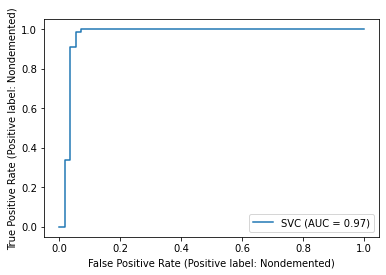

In [47]:
 metrics.plot_roc_curve(svm_clf, X_test, y_test)  
 plt.show() 

### Logistic Regression

In [48]:
#import Library LogisticRegression
from sklearn.linear_model import LogisticRegression

In [49]:
#Train
lr_clf = LogisticRegression(C=1, solver='liblinear').fit(X_train,y_train)
lr_clf

LogisticRegression(C=1, solver='liblinear')

In [50]:
yhat_lr = lr_clf.predict(X_test)

lr_yhat_prob = lr_clf.predict_proba(X_test)

In [51]:
LR_accuracy_score = accuracy_score(y_test,yhat_lr)*100
print("LR_accuracy_score :",LR_accuracy_score )

LR_accuracy_score : 96.7741935483871


##### LR Confusion matrix

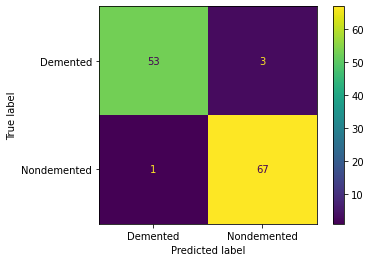

In [52]:
#confusion_matrix(y_test,yhat_lr)

plot_confusion_matrix(lr_clf, X_test, y_test)  
plt.show() 

In [53]:
# Confusion matrix using crosstab method of pandas.
LR_pd = pd.crosstab(y_test, yhat_lr, rownames=['True'], colnames=['Predicted'], margins=True)
LR_pd


Predicted,Demented,Nondemented,All
True,,,
Demented,53,3,56
Nondemented,1,67,68
All,54,70,124


##### LR Classification Report

In [54]:
#print(classification_report(y_test,yhat_lr))

print("confusion matrix\n",confusion_matrix(y_test,yhat_lr))
print("\nclassification report\n",classification_report(y_test,yhat_lr))
print("Accuracy: ",accuracy_score(y_test, yhat_lr)*100)

confusion matrix
 [[53  3]
 [ 1 67]]

classification report
               precision    recall  f1-score   support

    Demented       0.98      0.95      0.96        56
 Nondemented       0.96      0.99      0.97        68

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124

Accuracy:  96.7741935483871


In [55]:
LR_roc_auc_score= roc_auc_score(y_test, lr_clf.decision_function(X_test), average=None)
print("LR_roc_auc_score :",LR_roc_auc_score )

LR_roc_auc_score : 0.9779411764705883


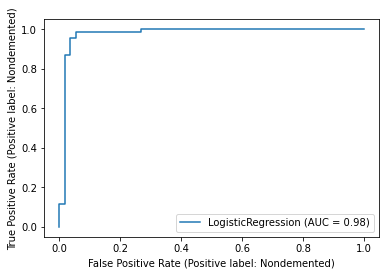

In [56]:
 metrics.plot_roc_curve(lr_clf, X_test, y_test)  
 plt.show() 

### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( random_state=0).fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_yhat_prob = rf_clf.predict_proba(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("confusion matrix\n",confusion_matrix(y_test,rf_pred))
print("\nclassification report\n",classification_report(y_test,rf_pred))
print("Accuracy: ",accuracy_score(y_test, rf_pred)*100)

confusion matrix
 [[54  2]
 [ 2 66]]

classification report
               precision    recall  f1-score   support

    Demented       0.96      0.96      0.96        56
 Nondemented       0.97      0.97      0.97        68

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124

Accuracy:  96.7741935483871


In [59]:
RF_accuracy_score = accuracy_score(y_test,rf_pred)*100
print("RF_accuracy_score :",RF_accuracy_score )

RF_accuracy_score : 96.7741935483871


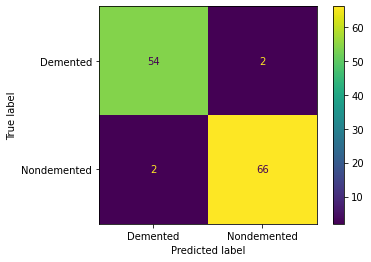

In [60]:
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show() 

In [61]:
# Confusion matrix using crosstab method of pandas.
RF_pd = pd.crosstab(y_test, rf_pred, rownames=['True'], colnames=['Predicted'], margins=True)
RF_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,54,2,56
Nondemented,2,66,68
All,56,68,124


In [62]:
RF_roc_auc_score= roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1], average=None)
print("RF roc_auc score :",RF_roc_auc_score )


RF roc_auc score : 0.9839810924369747


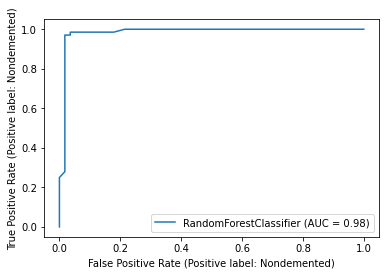

In [63]:
metrics.plot_roc_curve(rf_clf, X_test, y_test)  
    
plt.show() 

### Naive Bayes 


In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
gnb_clf = GaussianNB()

In [66]:
y_pred_gnb = gnb_clf.fit(X_train, y_train).predict(X_test)

In [67]:
#yhat_gnb = gnb.predict(X_test)

gnb_yhat_prob = gnb_clf.predict_proba(X_test)

In [68]:
gnb_Accuracy_score = metrics.accuracy_score(y_test, y_pred_gnb)*100
gnb_Accuracy_score

95.96774193548387

In [69]:

print("confusion matrix\n",confusion_matrix(y_test,y_pred_gnb))
print("\nclassification report\n",classification_report(y_test,y_pred_gnb))
print("Accuracy: ",accuracy_score(y_test, y_pred_gnb)*100)

confusion matrix
 [[53  3]
 [ 2 66]]

classification report
               precision    recall  f1-score   support

    Demented       0.96      0.95      0.95        56
 Nondemented       0.96      0.97      0.96        68

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96       124

Accuracy:  95.96774193548387


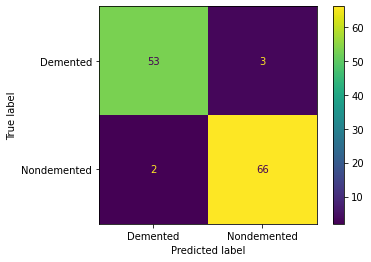

In [70]:
plot_confusion_matrix(gnb_clf, X_test, y_test)  
plt.show() 

In [71]:
# Confusion matrix using crosstab method of pandas.
GNV_pd = pd.crosstab(y_test, y_pred_gnb, rownames=['True'], colnames=['Predicted'], margins=True)
GNV_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,53,3,56
Nondemented,2,66,68
All,55,69,124


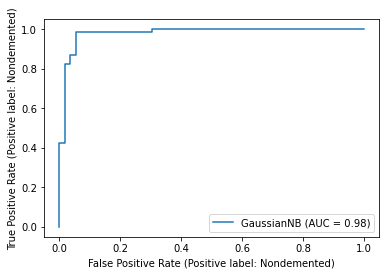

In [72]:
metrics.plot_roc_curve(gnb_clf, X_test, y_test)  
    
plt.show() 

In [73]:
gnb_roc_auc_score= roc_auc_score(y_test, gnb_clf.predict_proba(X_test)[:,1], average=None)
print("GNB roc_auc score :",gnb_roc_auc_score )


GNB roc_auc score : 0.9805672268907563


### Ada Boosting 

In [74]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [75]:
yhat_ada = ada_clf.predict(X_test)

#yhat_ada

In [76]:
ada_yhat_prob = ada_clf.predict_proba(X_test)
#ada_yhat_prob

In [77]:
ada_accuracy_score =accuracy_score(y_test, yhat_ada)*100
print("ada_accuracy_score :", ada_accuracy_score )


ada_accuracy_score : 96.7741935483871


In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("confusion matrix\n",confusion_matrix(y_test,yhat_ada))
print("\nclassification report\n",classification_report(y_test,yhat_ada))
print("Accuracy: ",accuracy_score(y_test, yhat_ada)*100)


confusion matrix
 [[54  2]
 [ 2 66]]

classification report
               precision    recall  f1-score   support

    Demented       0.96      0.96      0.96        56
 Nondemented       0.97      0.97      0.97        68

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124

Accuracy:  96.7741935483871


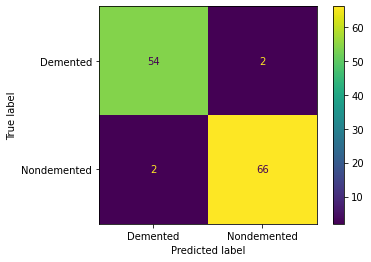

In [79]:
plot_confusion_matrix(ada_clf, X_test, y_test)  
plt.show() 

In [80]:
# Confusion matrix using crosstab method of pandas.
ada_pd = pd.crosstab(y_test, yhat_ada, rownames=['True'], colnames=['Predicted'], margins=True)
ada_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,54,2,56
Nondemented,2,66,68
All,56,68,124


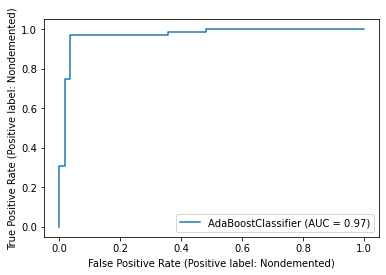

In [81]:
metrics.plot_roc_curve(ada_clf, X_test, y_test)  
    
plt.show() 

In [82]:
ada_roc_auc_score= roc_auc_score(y_test, ada_clf.decision_function(X_test), average=None)
print("ada_roc_auc_score :",ada_roc_auc_score )

ada_roc_auc_score : 0.9719012605042017


### Gradient boosting 

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
Gra_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                     max_depth=1, random_state=0).fit(X_train, y_train)


In [85]:
Gra_clf.score(X_test, y_test)

0.9758064516129032

In [86]:
yhat_Gra_cl = Gra_clf.predict(X_test)

Gra_yhat_prob = Gra_clf.predict_proba(X_test)

In [87]:
#print(accuracy_score(y_test, yhat_Gra_cl)*100)
#print(accuracy_score(y_test, yhat_Gra_cl))

gra_accuracy_score = Gra_clf.score(X_test, y_test)*100
print("gra_accuracy_score :", gra_accuracy_score )

gra_accuracy_score : 97.58064516129032


In [88]:

print("confusion matrix\n",confusion_matrix(y_test,yhat_Gra_cl))
print("\nclassification report\n",classification_report(y_test,yhat_Gra_cl))
print("Accuracy: ",accuracy_score(y_test, yhat_Gra_cl)*100)

confusion matrix
 [[54  2]
 [ 1 67]]

classification report
               precision    recall  f1-score   support

    Demented       0.98      0.96      0.97        56
 Nondemented       0.97      0.99      0.98        68

    accuracy                           0.98       124
   macro avg       0.98      0.97      0.98       124
weighted avg       0.98      0.98      0.98       124

Accuracy:  97.58064516129032


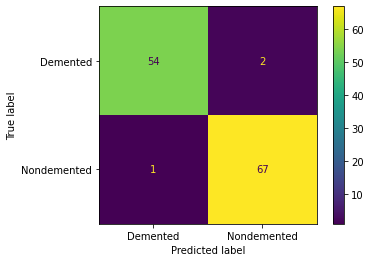

In [89]:
plot_confusion_matrix(Gra_clf, X_test, y_test)  
plt.show() 

In [90]:
# Confusion matrix using crosstab method of pandas.
Gra_pd = pd.crosstab(y_test, yhat_Gra_cl, rownames=['True'], colnames=['Predicted'], margins=True)
Gra_pd

Predicted,Demented,Nondemented,All
True,,,
Demented,54,2,56
Nondemented,1,67,68
All,55,69,124


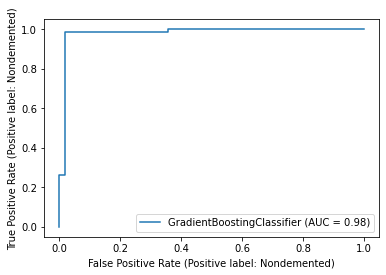

In [91]:
metrics.plot_roc_curve(Gra_clf, X_test, y_test)  
    
plt.show() 

In [92]:
gra_roc_auc_score= roc_auc_score(y_test, Gra_clf.decision_function(X_test), average=None)
print("gra_roc_auc_score :",gra_roc_auc_score )

gra_roc_auc_score : 0.9818802521008403


### Results
#### Accuracy score report dataframe

In [102]:
# create a accuracy list
accuracy_score = [ SVM_accuracy_score,LR_accuracy_score,RF_accuracy_score,gnb_Accuracy_score,ada_accuracy_score,gra_accuracy_score]

# create a AUC-score list
auc_score = [SVM_roc_auc_score,LR_roc_auc_score,RF_roc_auc_score,gnb_roc_auc_score,ada_roc_auc_score,gra_roc_auc_score]



# fomulate the report format
df_report = pd.DataFrame(accuracy_score, index=['SVM','Logistic Regression','Random Forest','Naive Bayes','Ada Boosting','Gradient boosting',])
df_report.columns = ['Accuracy Score']
df_report.insert(loc=1, column='ROC AUC Score', value= auc_score)
df_report.columns.name = 'Algorithm'
df_report

Algorithm,Accuracy Score,ROC AUC Score
SVM,96.774194,0.968487
Logistic Regression,96.774194,0.977941
Random Forest,96.774194,0.983981
Naive Bayes,95.967742,0.980567
Ada Boosting,96.774194,0.971901
Gradient boosting,97.580645,0.98188
EVM,96.774194,NA


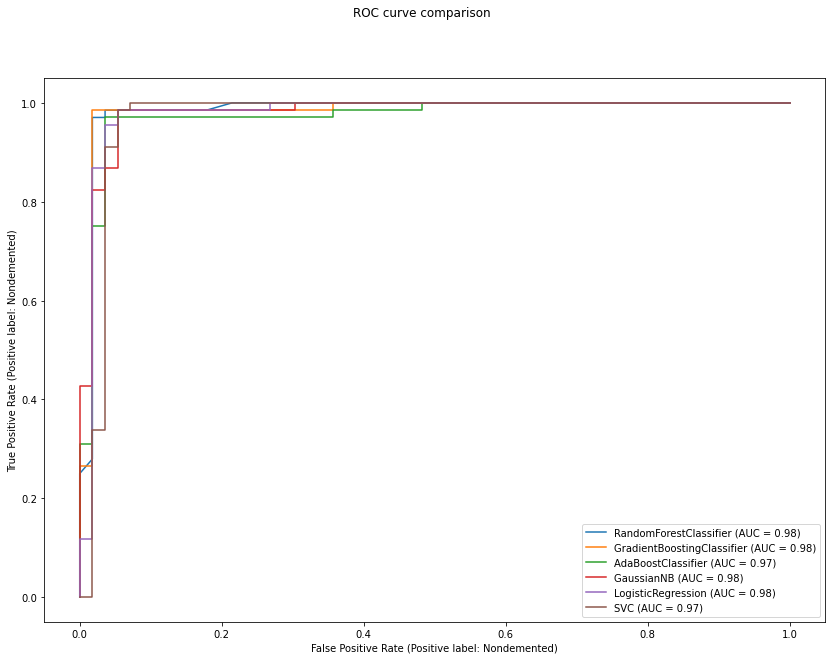

In [103]:
fig = metrics.plot_roc_curve(rf_clf, X_test, y_test) 
fig = metrics.plot_roc_curve(Gra_clf, X_test, y_test,ax = fig.ax_ )
fig = metrics.plot_roc_curve(ada_clf, X_test, y_test,ax = fig.ax_ )
fig = metrics.plot_roc_curve(gnb_clf, X_test, y_test,ax = fig.ax_ )
#metrics.plot_roc_curve(rf_regressor, X_test, y_test)  
fig = metrics.plot_roc_curve(lr_clf, X_test, y_test,ax = fig.ax_ )  
fig = metrics.plot_roc_curve(svm_clf, X_test, y_test,ax = fig.ax_ )  


fig.figure_.suptitle("ROC curve comparison")
fig.figure_.set_size_inches(14,10)
plt.show() 